In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Iris laden
iris = load_iris()
X_iris = iris.data[:, :2]  # Nur 2 Features für Visualisierung

print(f"Shape: {X_iris.shape}")
print(f"Bekannte Klassen: {iris.target_names}")

Shape: (150, 2)
Bekannte Klassen: ['setosa' 'versicolor' 'virginica']


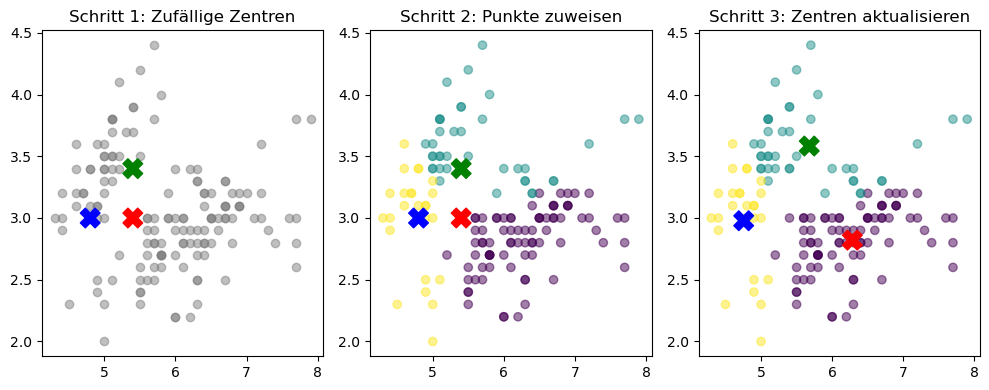

In [4]:
import matplotlib.pyplot as plt

# Schritt 1: Zufällige Startzentren wählen
#np.random.seed(42)
k = 3
centers = X_iris[np.random.choice(len(X_iris), k, replace=False)]

plt.figure(figsize=(10, 4))

# Iteration 0: Startzustand
plt.subplot(1, 3, 1)
plt.scatter(X_iris[:,0], X_iris[:,1], c='gray', alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], c=['red','green','blue'], marker='X', s=200)
plt.title('Schritt 1: Zufällige Zentren')

# Schritt 2: Punkte zum nächsten Zentrum zuweisen
from scipy.spatial.distance import cdist
distances = cdist(X_iris, centers)
labels = distances.argmin(axis=1)

plt.subplot(1, 3, 2)
plt.scatter(X_iris[:,0], X_iris[:,1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], c=['red','green','blue'], marker='X', s=200)
plt.title('Schritt 2: Punkte zuweisen')

# Schritt 3: Zentren neu berechnen
new_centers = np.array([X_iris[labels==i].mean(axis=0) for i in range(k)])

plt.subplot(1, 3, 3)
plt.scatter(X_iris[:,0], X_iris[:,1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(new_centers[:,0], new_centers[:,1], c=['red','green','blue'], marker='X', s=200)
plt.title('Schritt 3: Zentren aktualisieren')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Country-Daten laden und skalieren
df = pd.read_csv('Country-data.csv')
X = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow-Methode
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualisierung
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow-Methode')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Country-data.csv'